<a href="https://colab.research.google.com/github/Karansingh-25/Tensorflow/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tf.random.set_seed(42)
X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
Y=X+10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Split the dataset

X_train=X[:40]
X_test=X[40:]

Y_train=Y[:40]
Y_test=Y[40:]

len(X_train),len(X_test),len(Y_train),len(Y_test)

(40, 10, 40, 10)

In [ ]:
# Create the model

model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

# model.fit(tf.expand_dims(X,axis=-1),Y,epochs=50)

In [ ]:
# Create again

new_model=tf.keras.Sequential([
    tf.keras.layers.Dense(20,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(20,input_shape=[1],name="hidden_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
])

new_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

In [ ]:
new_model.fit(tf.expand_dims(X_train,axis=-1),Y_train,epochs=20)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.9565 - mae: 11.9565
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.3220 - mae: 12.3220
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 12.6510 - mae: 12.6510
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 13.3231 - mae: 13.3231
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 9.8850 - mae: 9.8850
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10.4809 - mae: 10.4809
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.0290 - mae: 11.0290
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.5294 - mae: 11.5294
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 11.9834 - mae: 11.9834
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 12.3931 - mae: 12.3931 
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 13.1567 - mae: 13.1567
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 9.7584 - mae: 9.7584
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
Y_pred=new_model.predict(X_test)
Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


array([[ 68.1393  ],
       [ 72.56262 ],
       [ 76.98596 ],
       [ 81.409294],
       [ 85.83262 ],
       [ 90.255936],
       [ 94.679276],
       [ 99.1026  ],
       [103.52594 ],
       [107.94928 ]], dtype=float32)

In [ ]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test):
    """
    plots the graph of predicted vs ground data"""


    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels,c="b",label="Training data")
    plt.scatter(test_data,test_labels,c="g",label="Testing Data")
    plt.scatter(test_data,Y_pred,c="red",label="Predicted data")
    plt.legend()
    # plt.show()

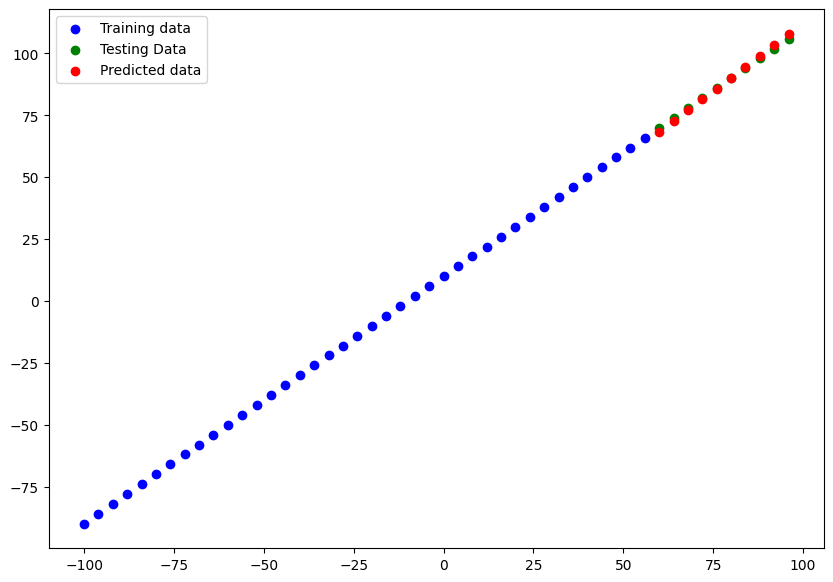

In [ ]:
plot_predictions()

In [ ]:
new_model.evaluate(X_test,Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - loss: 1.0583 - mae: 1.0583


[1.058323621749878, 1.058323621749878]

In [ ]:
mae=tf.keras.losses.MAE(Y_test,tf.squeeze(Y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.058323621749878>

In [ ]:
mse=tf.keras.losses.MSE(Y_test,tf.squeeze(Y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1.4804322719573975>

In [ ]:
def mae(y_test,y_pred):
    return tf.keras.losses.MAE(y_test,tf.squeeze(y_pred))

def mse(y_test,y_pred):
    return tf.keras.losses.MSE(y_test,tf.squeeze(y_pred))


In [ ]:
mae(Y_test,Y_pred),mse(Y_test,Y_pred)

(<tf.Tensor: shape=(), dtype=float32, numpy=1.058323621749878>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.4804322719573975>)

In [ ]:
#Save the model
new_model.save("perfect_linear_model.keras")